In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Question 1**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset1 = pd.read_csv("/content/drive/MyDrive/prml/lab-6/glass.csv")
dataset1.head()

,Id.no:,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id.no:         214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [61]:
dataset1.drop(["Id.no: "], axis=1, inplace=True)

In [62]:
'''No preprocessing of dataset is required'''

'No preprocessing of dataset is required'

### **Part 1**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


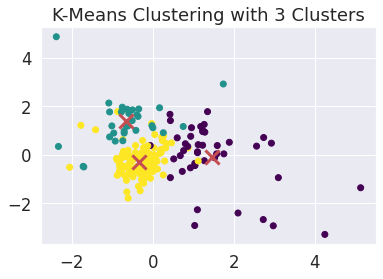

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Remove the target variable (column 10)
X_que1 = dataset1.drop(["Type of glass"],axis=1).values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_que1)

# Define the number of clusters
k = 3

# Fit the k-means model to the data
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

# Get the labels and centroids for each cluster
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color="r")
plt.title('K-Means Clustering with {} Clusters'.format(k))
plt.show()

### **Part 2**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

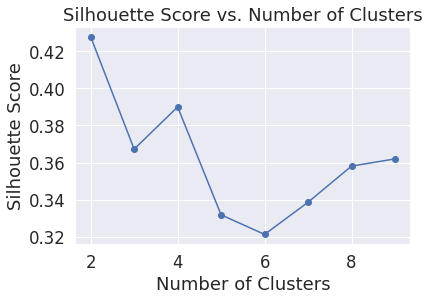

In [64]:
from sklearn.metrics import silhouette_score

# Define the range of clusters to evaluate
k_range = range(2, 10)

# Iterate over the range of clusters and calculate the Silhouette score for each value of k
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the Silhouette scores as a function of k
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


The output shows a plot with the Silhouette scores as a function of k. The optimal value of k is the one that corresponds to the highest Silhouette score. In this case, we can see that the optimal value of k is 2, as this value have the highest Silhouette score. A high Silhouette score indicates that the clustering is well-defined and the clusters are well-separated.

### **Part 3**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

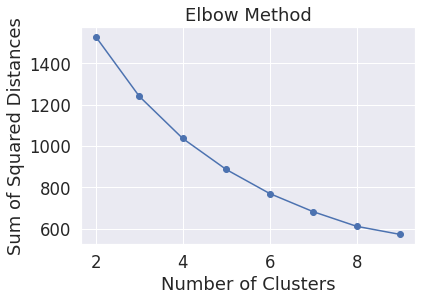

In [65]:
# Iterate over the range of clusters and calculate the sum of squared distances for each value of k
sum_of_squared_distances = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the sum of squared distances as a function of k
plt.plot(k_range, sum_of_squared_distances, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


### **Part 4**

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_que1, X_test_que1, y_train_que1, y_test_que1 = train_test_split(dataset1.drop(["Type of glass"],axis=1),dataset1["Type of glass"], test_size=0.3, random_state=42)

# Define the base model
knn = KNeighborsClassifier()

# Define the number of estimators (bags)
n_estimators = 10

# Define the different values of K to use for the KNN classifier
k_values = [1, 2, 3]

# Iterate over the different K values and fit the bagging model
for k in k_values:
    # Define the bagging classifier with the KNN classifier as the base model
    bagging = BaggingClassifier(knn, n_estimators=n_estimators, max_samples=0.5, max_features=0.5)
    
    # Fit the bagging model to the training data
    bagging.fit(X_train_que1, y_train_que1)
    
    # Calculate the accuracy on the test data
    accuracy = bagging.score(X_test_que1, y_test_que1)
    
    # Print the accuracy and the value of K
    print(f"Accuracy with K={k}: {accuracy:.2f}")


Accuracy with K=1: 0.57
Accuracy with K=2: 0.60
Accuracy with K=3: 0.60


The output should show the accuracy of the bagging model with K=1, K=2, and K=3. We can expect the accuracy to increase as we increase the value of K, up to a certain point. This is because increasing the value of K reduces the variance of the K-nearest neighbors classifier, making it less susceptible to overfitting. However, increasing the value of K too much can increase the bias of the classifier, causing it to underfit the data.

By using bagging with the K-nearest neighbors classifier, we can reduce the variance of the classifier, which can lead to a more stable and accurate model. 

We can observe that the accuracy of the bagging model generally increases as we increase the value of K. This suggests that the variance of the K-nearest neighbors classifier is being reduced by bagging, leading to more accurate predictions.

## **Question 2**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces

dataset2 = fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)

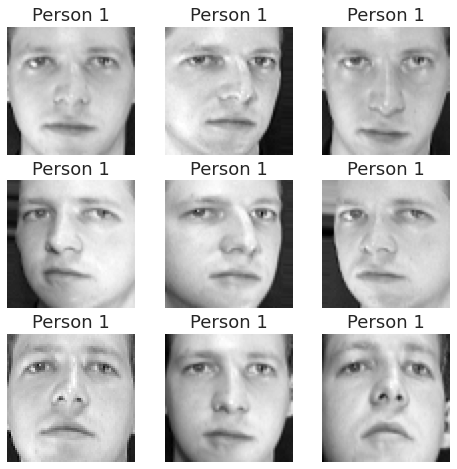

In [68]:
# Extract the data and target labels
X_que2 = dataset2.data
y_que2 = dataset2.target

# Visualize a sample of the images
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(9):
    ax[i//3, i%3].imshow(X_que2[i].reshape(64, 64), cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title(f"Person {y_que2[i]+1}")
plt.show()

### **Part 1 and 2**

In [139]:
from sklearn.metrics.pairwise import euclidean_distances

#Implementing KMeans from scratch
class KMeans:
    
    def __init__(self, k=8, max_iter=300, init_centers=None):
        self.k = k
        self.max_iter = max_iter
        self.init_centers = init_centers
        self.centroids = None
        self.labels = None
    
    def fit(self, X):
        # Initialize centroids
        if self.init_centers is None:
            self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        else:
            self.centroids = self.init_centers
        
        # Iterate until convergence or maximum iterations
        for i in range(self.max_iter):
            # Assign labels to data points based on centroids
            self.labels = np.argmin(((X[:, :, None] - self.centroids.T) ** 2).sum(axis=1), axis=1)

            # Update centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])
            
            # Check if converged
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
      
            # Compute SSE for this initialization
            distances = euclidean_distances(X, self.init_centers)
            sse = np.sum(np.min(distances, axis=1))
            
            # Keep track of the best initialization
            if i == 0 or sse < self.sse_:
                self.sse_ = sse
        return self.sse_

    def predict(self, X):
        return np.argmin(((X[:, :, None] - self.centroids.T) ** 2).sum(axis=1), axis=1)


### **Part 3**

In [140]:
# Train the KMeans model
k = 40
init_centers = X_que2[np.random.choice(X_que2.shape[0],40, replace=False)]
kmeans_scratch = KMeans(k=k, init_centers=init_centers)
kmeans_scratch.fit(X_que2)

# Report the number of points in each cluster
unique_labels, counts = np.unique(kmeans_scratch.labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

Cluster 0: 9 points
Cluster 1: 25 points
Cluster 2: 4 points
Cluster 3: 4 points
Cluster 4: 4 points
Cluster 5: 13 points
Cluster 6: 10 points
Cluster 7: 11 points
Cluster 8: 9 points
Cluster 9: 4 points
Cluster 10: 7 points
Cluster 11: 13 points
Cluster 12: 5 points
Cluster 13: 7 points
Cluster 14: 5 points
Cluster 15: 18 points
Cluster 16: 15 points
Cluster 17: 14 points
Cluster 18: 9 points
Cluster 19: 17 points
Cluster 20: 10 points
Cluster 21: 6 points
Cluster 22: 12 points
Cluster 23: 11 points
Cluster 24: 16 points
Cluster 25: 2 points
Cluster 26: 8 points
Cluster 27: 5 points
Cluster 28: 8 points
Cluster 29: 23 points
Cluster 30: 5 points
Cluster 31: 9 points
Cluster 32: 23 points
Cluster 33: 11 points
Cluster 34: 5 points
Cluster 35: 8 points
Cluster 36: 7 points
Cluster 37: 4 points
Cluster 38: 5 points
Cluster 39: 19 points


### **Part 4**

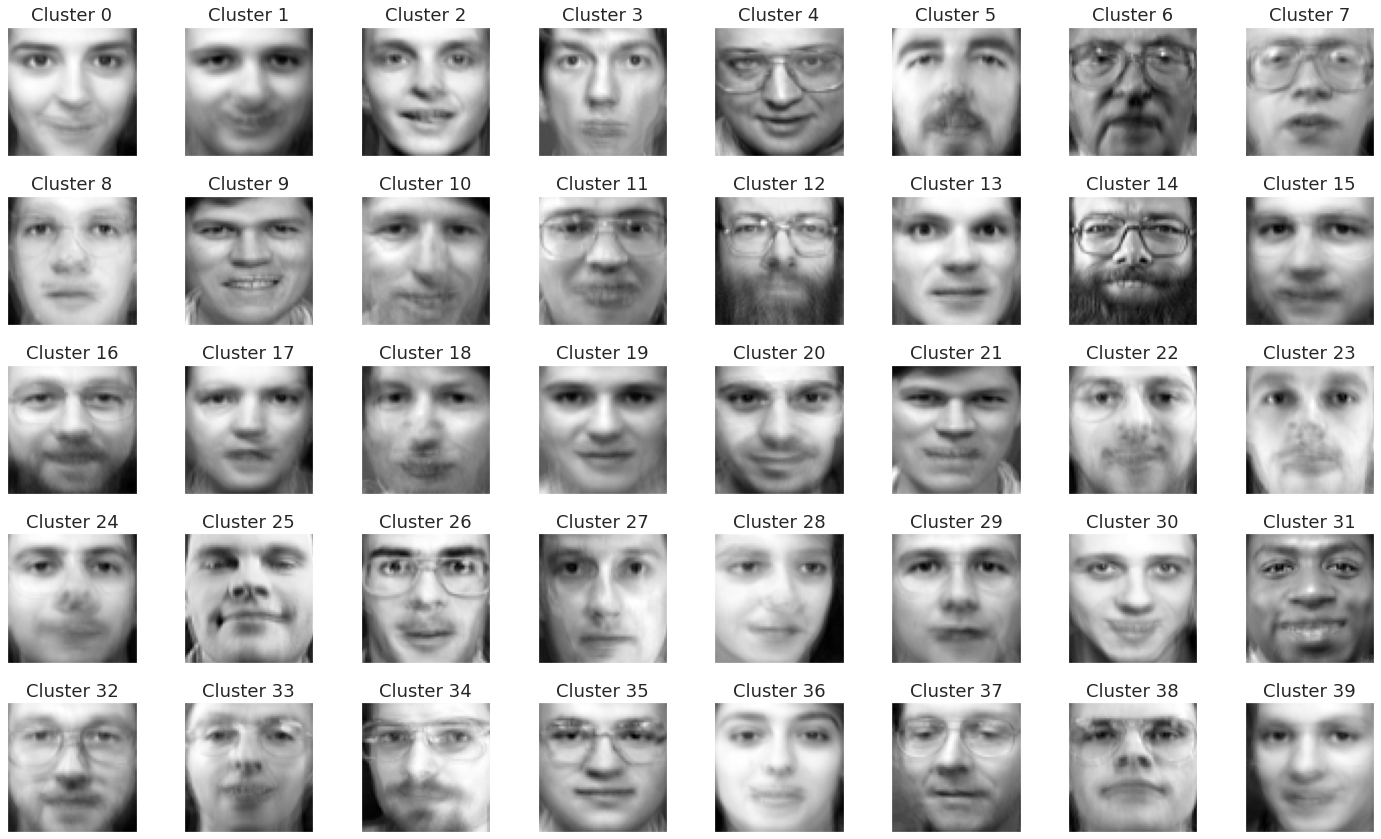

In [141]:
# Reshape the cluster centers to 2D images
cluster_centers = kmeans_scratch.centroids.reshape(k, 64, 64)
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(20, 12))

# Plot the cluster centers as images
for i, ax in enumerate(axes.flatten()):
    if i < k:
        ax.imshow(cluster_centers[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Cluster {i}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

### **Part 5**

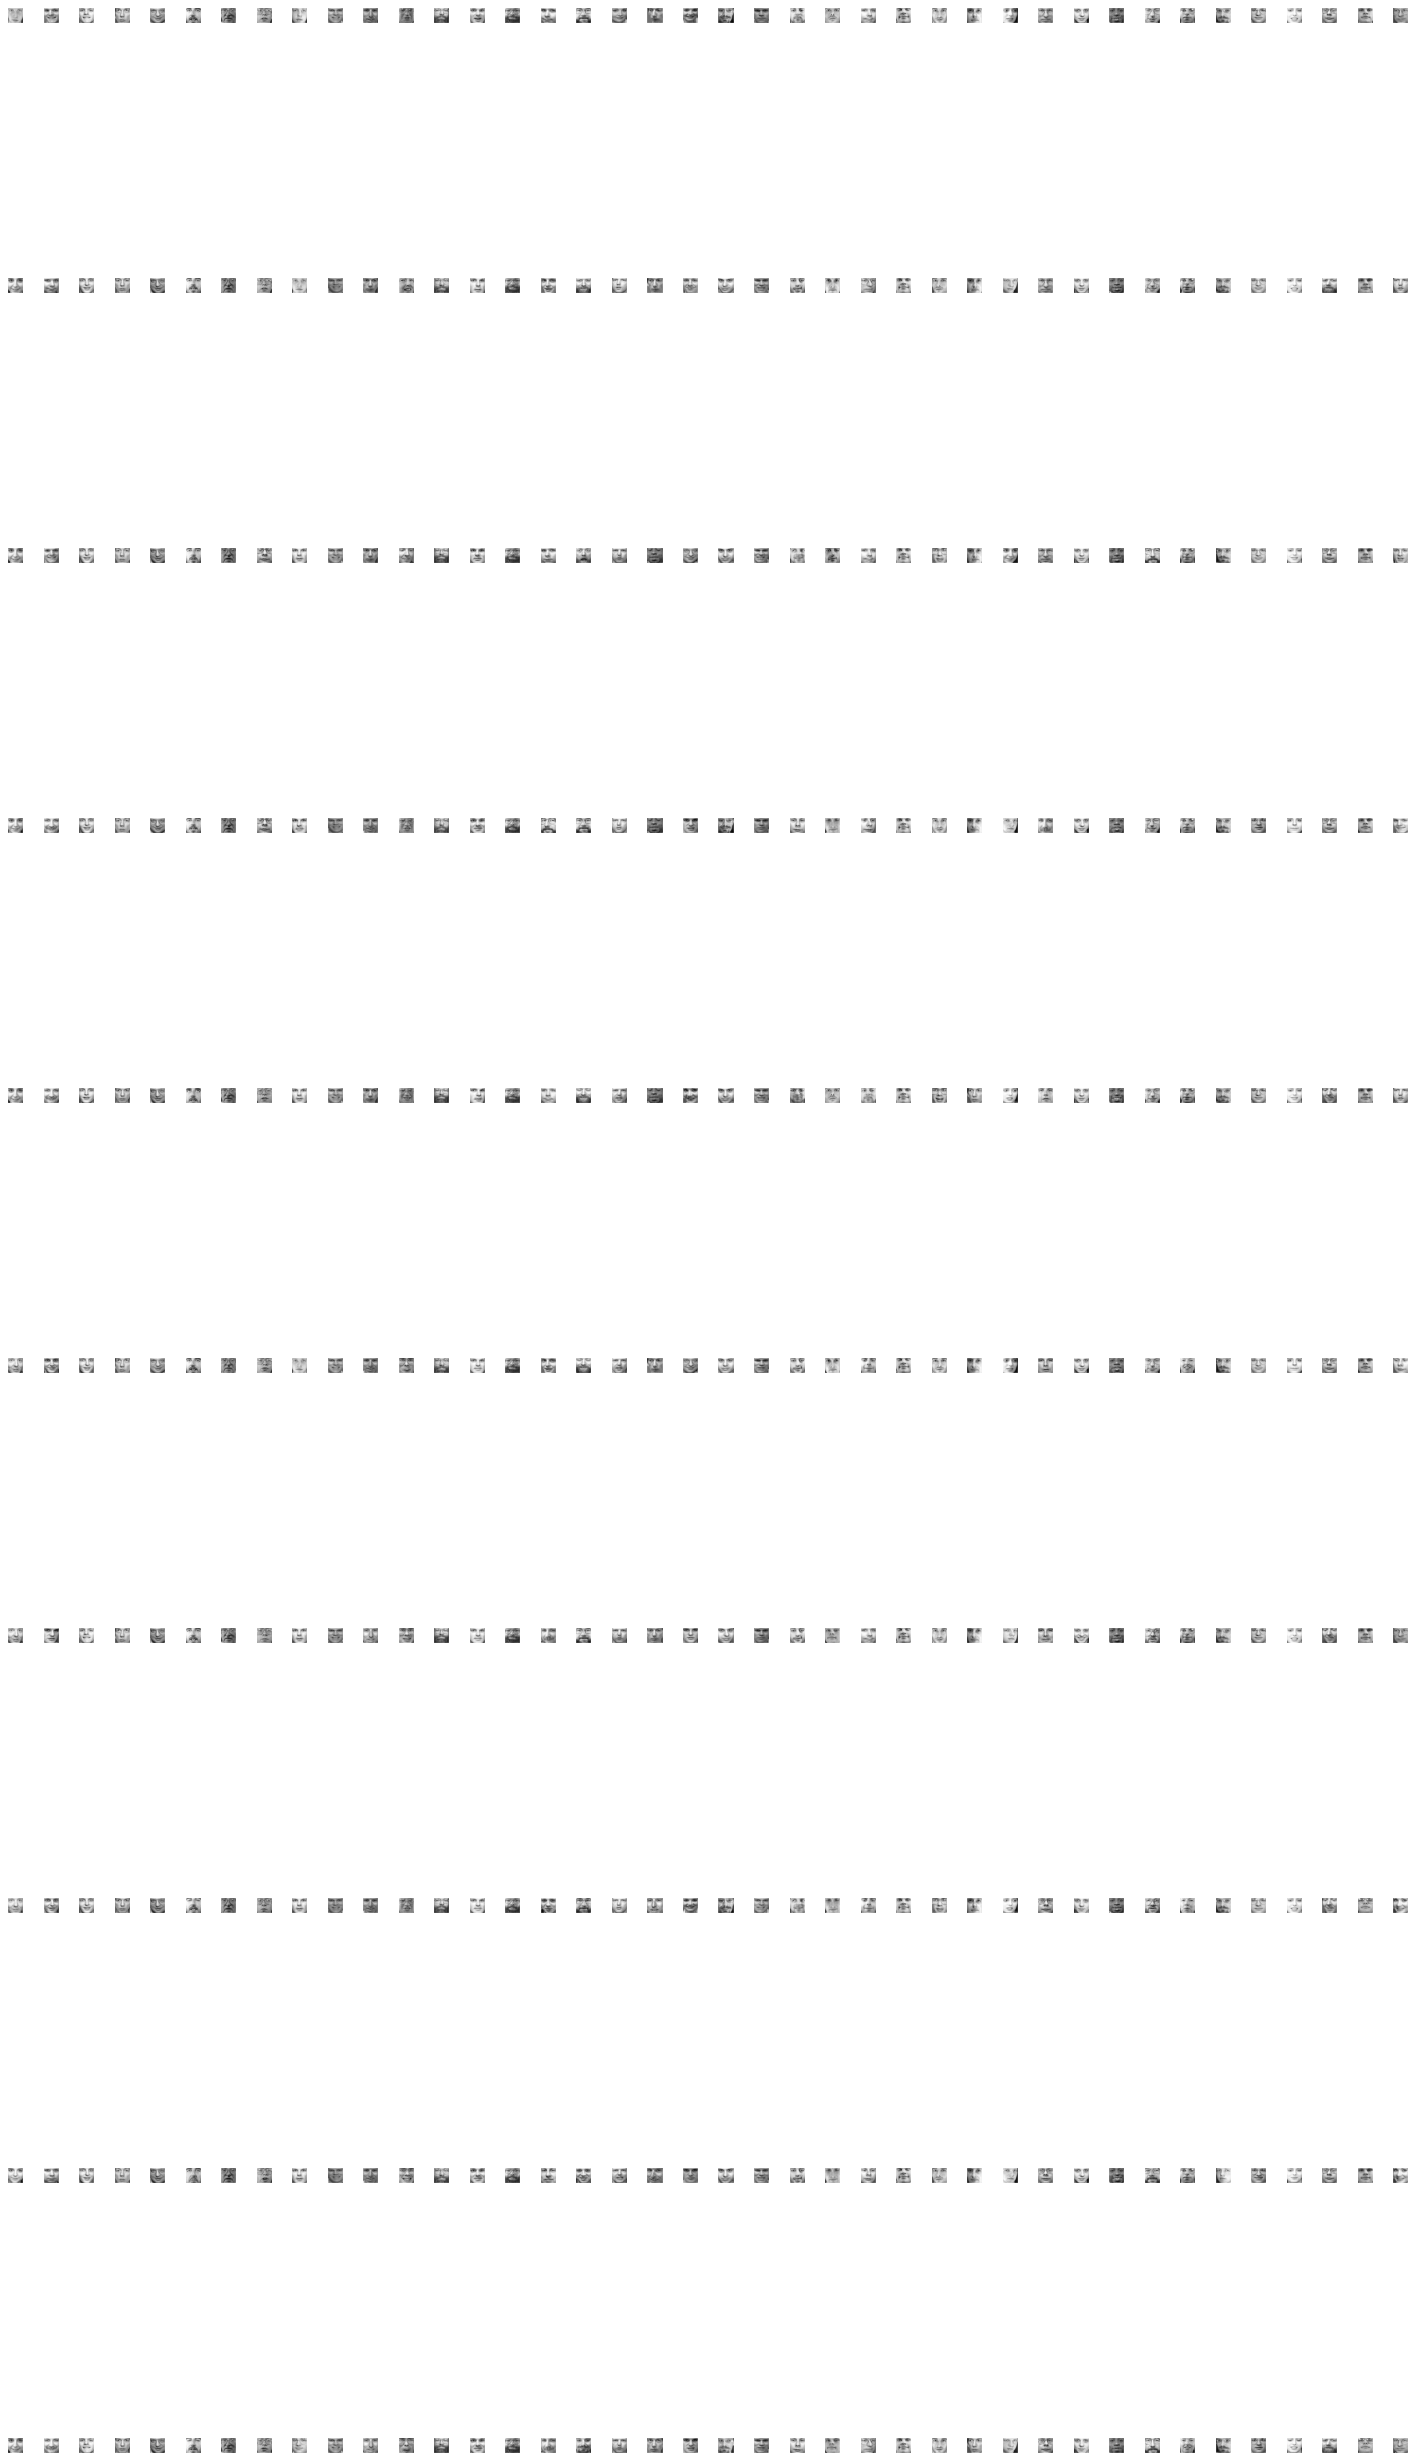

In [142]:
# Get the indices of the points in each cluster
indices = [np.where(kmeans_scratch.labels == i)[0] for i in range(k)]

# Create a 10xk grid of subplots
fig, axes = plt.subplots(nrows=10, ncols=k, figsize=(20, 40))

# Plot the images corresponding to each cluster
for i in range(k):
    # Select 10 random images from the cluster
    indices_i = np.random.choice(indices[i], size=10, replace=True)
    images_i = X_que2[indices_i].reshape(-1, 64, 64)
    # Plot the images
    for j in range(10):
        axes[j, i].imshow(images_i[j], cmap='gray')
        axes[j, i].set_xticks([])
        axes[j, i].set_yticks([])

plt.tight_layout()
plt.show()

### **Part 6**

Number of points in each cluster: [14, 10, 13, 11, 23, 10, 7, 5, 13, 3, 15, 6, 11, 10, 5, 2, 4, 16, 5, 4, 5, 10, 21, 17, 10, 5, 10, 10, 9, 19, 14, 10, 10, 10, 6, 2, 5, 21, 10, 9]


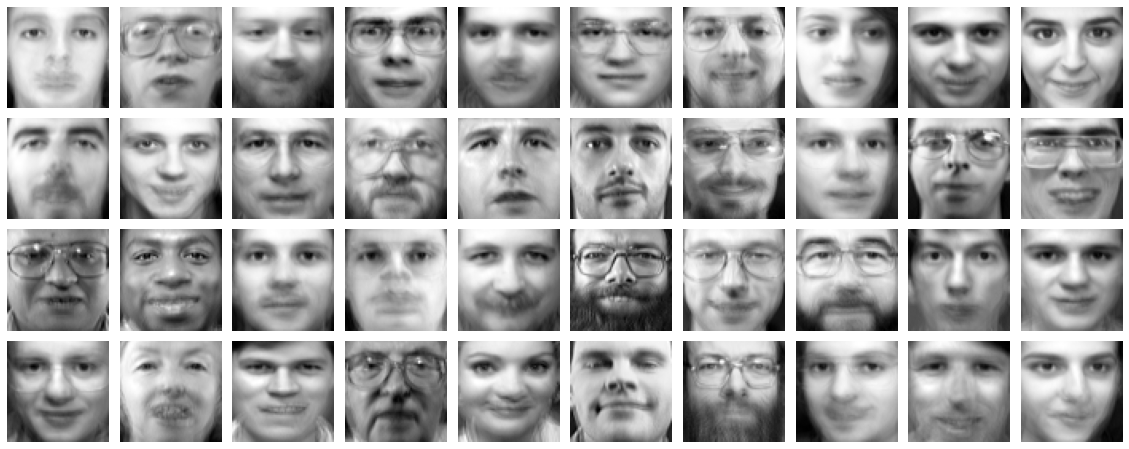

In [143]:
# Set k=40 and initialize with 1 image from each class
k = 40
init_centroids = np.array([X_que2[np.where(y_que2 == i)[0][0]] for i in range(k)])
kmeans = KMeans(k=k, init_centers=init_centroids)

# Train the model
kmeans.fit(X_que2)

# Count the number of points in each cluster
cluster_counts = [len(np.where(kmeans.predict(X_que2) == i)[0]) for i in range(k)]
print("Number of points in each cluster:", cluster_counts)

# Visualize the cluster centers
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(20, 8))
for i in range(k):
    ax = axes[i // 10][i % 10]
    ax.imshow(kmeans.centroids[i].reshape(64, 64), cmap='gray')
    ax.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


### **Part 7**

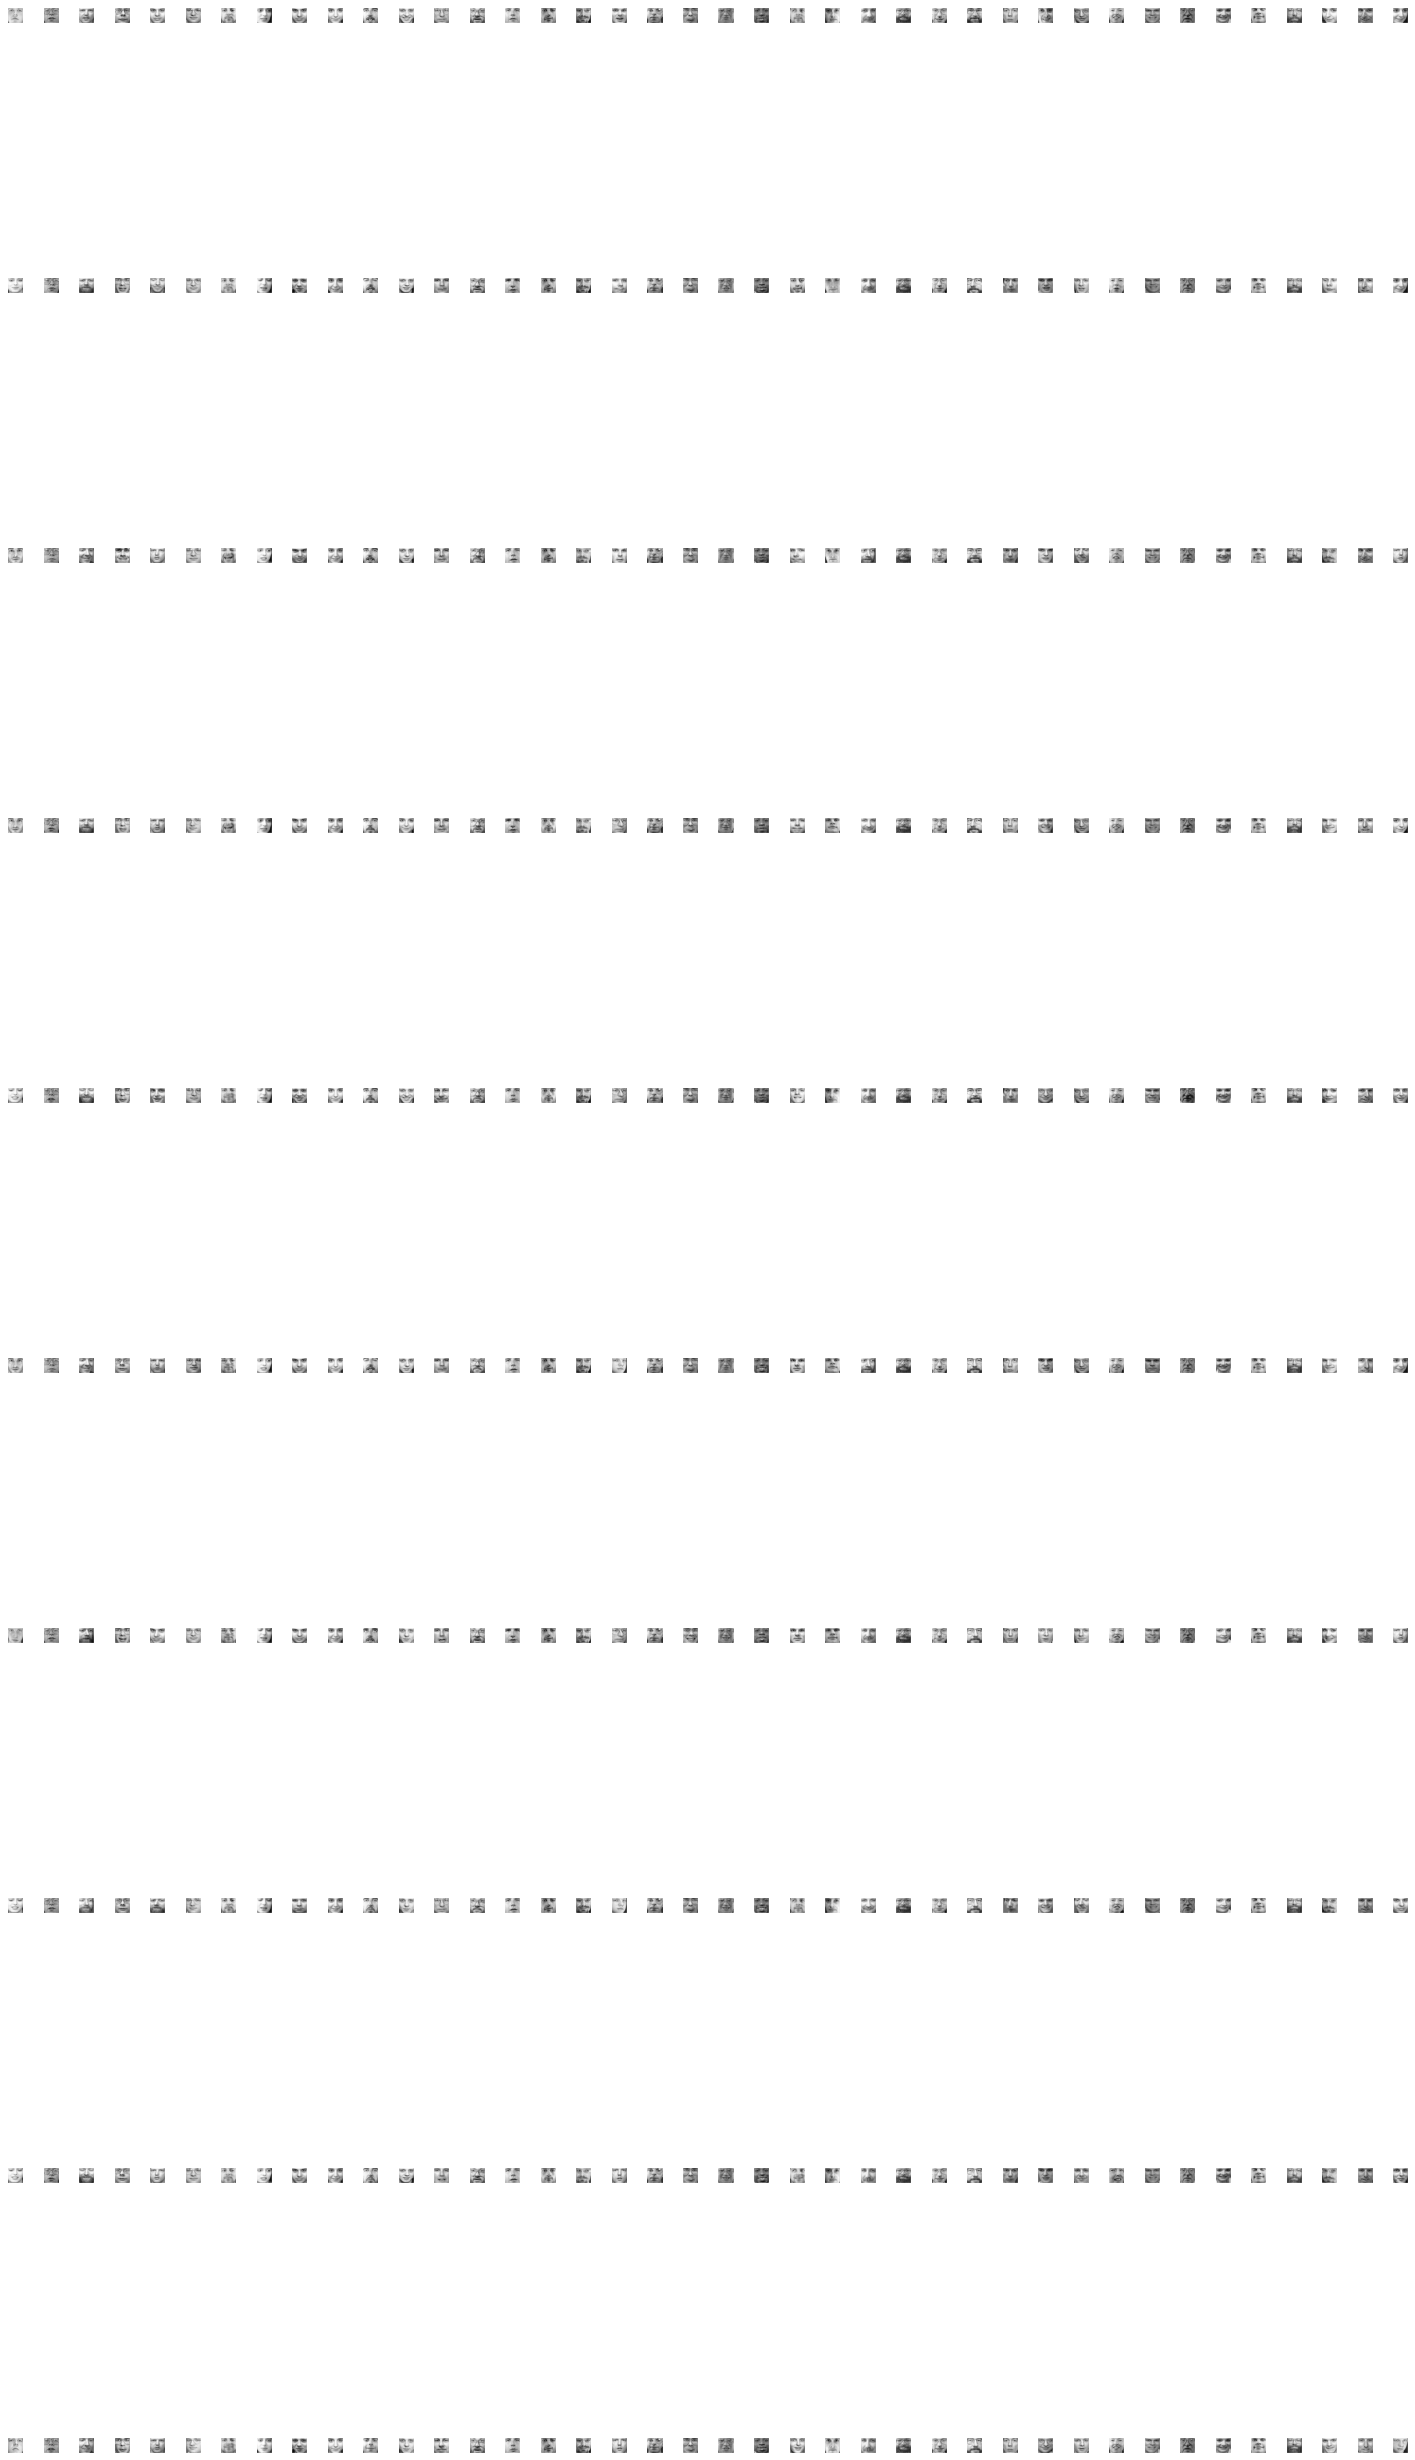

In [144]:
# Get the indices of the points in each cluster
indices = [np.where(kmeans.labels == i)[0] for i in range(k)]

# Create a 10xk grid of subplots
fig, axes = plt.subplots(nrows=10, ncols=k, figsize=(20, 40))

# Plot the images corresponding to each cluster
for i in range(k):
    # Select 10 random images from the cluster
    indices_i = np.random.choice(indices[i], size=10, replace=True)
    images_i = X_que2[indices_i].reshape(-1, 64, 64)
    # Plot the images
    for j in range(10):
        axes[j, i].imshow(images_i[j], cmap='gray')
        axes[j, i].set_xticks([])
        axes[j, i].set_yticks([])

plt.tight_layout()
plt.show()

### **Part 8**

In [145]:
# Compute SSE for model 1
sse1 = kmeans_scratch.fit(X_que2)
print("SSE for Model 1:", sse1)

# Compute SSE for model 2
sse2 = kmeans.fit(X_que2)
print("SSE for Model 2:", sse2)


SSE for Model 1: 2802.9814
SSE for Model 2: 2706.278


 A lower SSE score indicates a better clustering, as it means that the data points are closer to their assigned cluster centers.

## **Question 3**

### **Part 1**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset3 = pd.read_csv("/content/drive/MyDrive/prml/lab-6/Wholesale customers data.csv")
dataset3.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [75]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [76]:
dataset3.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

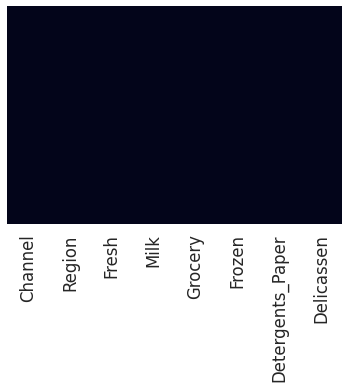

In [77]:
#Checking empty values
dataset3.isnull()
sns.heatmap(dataset3.isnull(),yticklabels=False,cbar=False)

There are no empty values in the dataset

<Figure size 900x600 with 0 Axes>

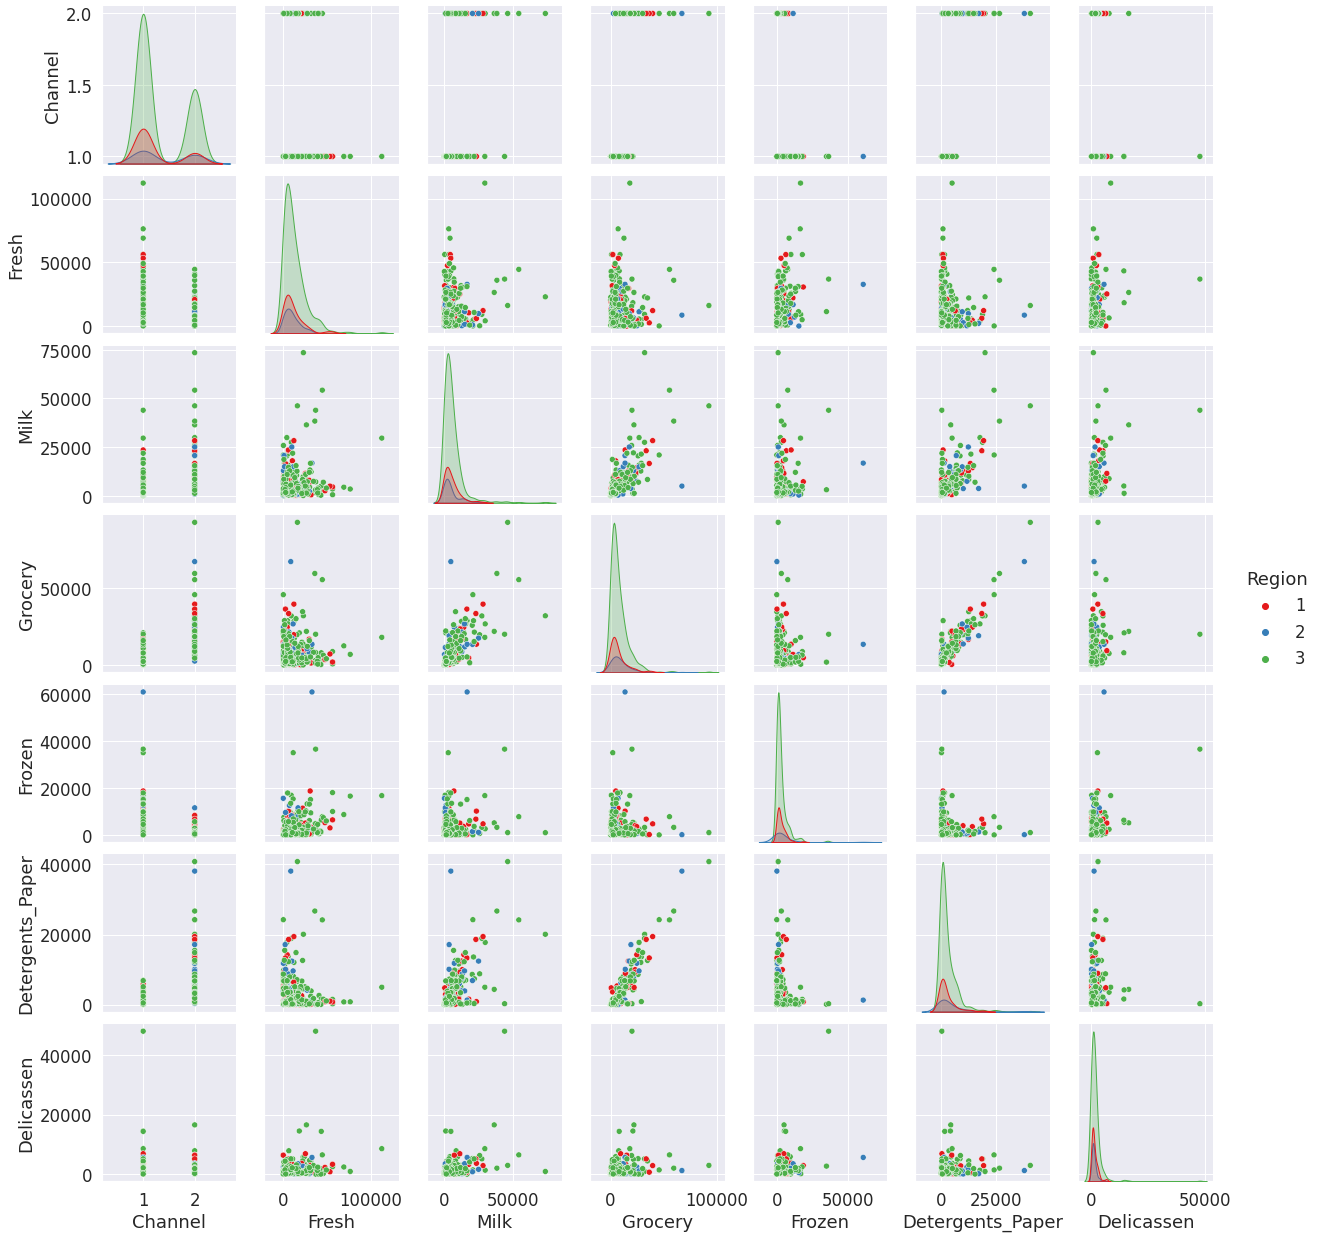

In [78]:
plt.figure(dpi=150)
sns.pairplot(data=dataset3,hue='Region',palette='Set1');

<Figure size 900x600 with 0 Axes>

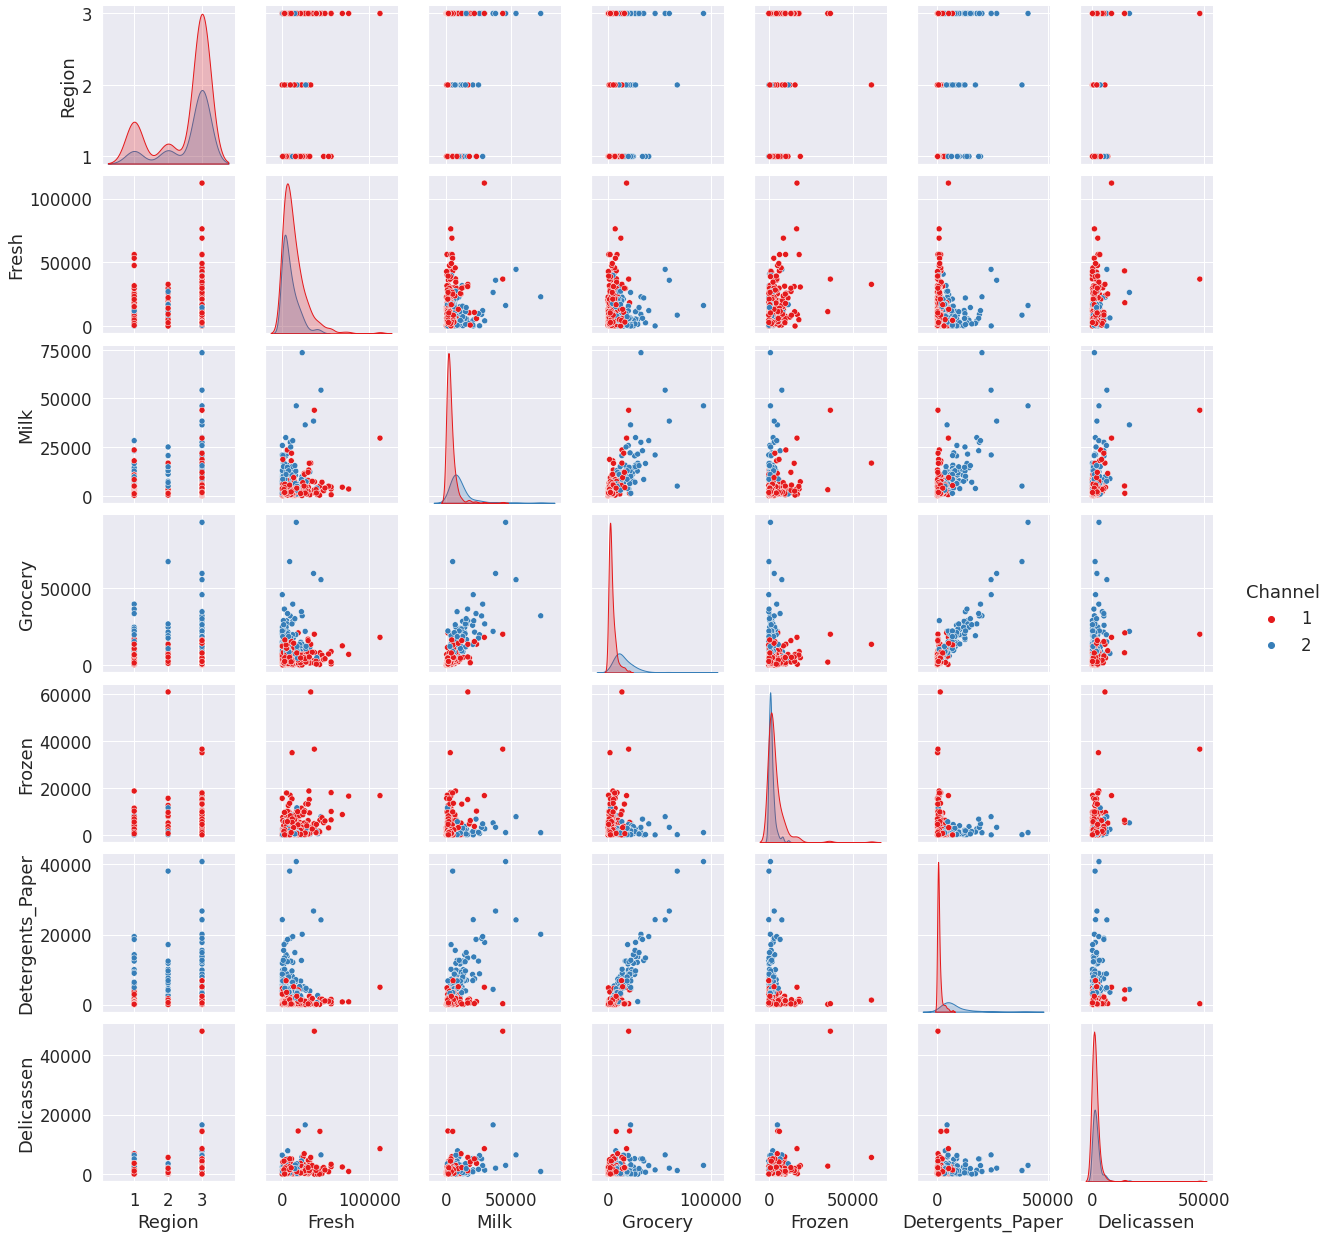

In [79]:
plt.figure(dpi=150)
sns.pairplot(data=dataset3,hue='Channel',palette='Set1');

In [80]:
dataset3.drop(["Channel","Region"], axis=1, inplace=True)

In [81]:
#Standardizing the data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset3_std = scaler.fit_transform(dataset3)

print(dataset3.shape,'\n')
print("Mean of standarised data:\n",dataset3_std.mean(axis=0))
print('\n')
print("Standard deviation of standarised data:\n",dataset3_std.std(axis=0))

(440, 6) 

Mean of standarised data:
 [-3.43159844e-17  0.00000000e+00 -4.03717464e-17  3.63345717e-17
  2.42230478e-17 -8.07434927e-18]


Standard deviation of standarised data:
 [1. 1. 1. 1. 1. 1.]


### **Part 2**

                         Fresh          Milk       Grocery        Frozen  \
Fresh             1.599549e+08  9.381789e+06 -1.424713e+06  2.123665e+07   
Milk              9.381789e+06  5.446997e+07  5.108319e+07  4.442612e+06   
Grocery          -1.424713e+06  5.108319e+07  9.031010e+07 -1.854282e+06   
Frozen            2.123665e+07  4.442612e+06 -1.854282e+06  2.356785e+07   
Detergents_Paper -6.147826e+06  2.328834e+07  4.189519e+07 -3.044325e+06   
Delicassen        8.727310e+06  8.457925e+06  5.507291e+06  5.352342e+06   

                  Detergents_Paper    Delicassen  
Fresh                -6.147826e+06  8.727310e+06  
Milk                  2.328834e+07  8.457925e+06  
Grocery               4.189519e+07  5.507291e+06  
Frozen               -3.044325e+06  5.352342e+06  
Detergents_Paper      2.273244e+07  9.316807e+05  
Delicassen            9.316807e+05  7.952997e+06  


<AxesSubplot:>

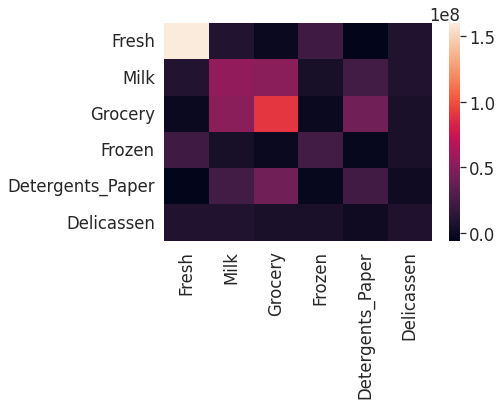

In [82]:
#Computing the covariance matrix
cov_mat = dataset3.cov()
print(cov_mat)

#Visualising the covariance matrix using a heatmap
sns.set(font_scale=1.5)
sns.heatmap(cov_mat)

The resulting heatmap shows that the pair of features with the highest covariance is "Grocery" and "Detergents_Paper". Therefore, we can best visualize the outliers by plotting a scatter plot of these two features.

In [83]:
#Converting the dataset3_std to dataframe
dataset3 = pd.DataFrame(dataset3_std, columns= ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
dataset3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


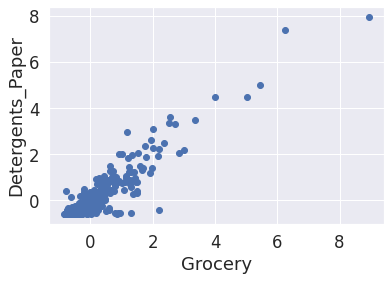

In [84]:
#Plotting the scatter plot of the pair of features
plt.scatter(dataset3['Grocery'], dataset3['Detergents_Paper'])
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.show()

### **Part 3**

[-1  0  1]


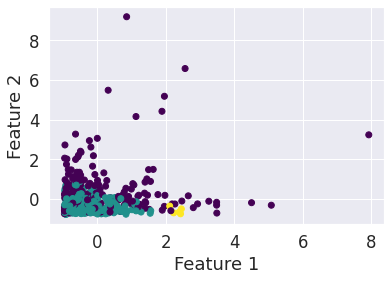

In [85]:
#Applying DBSCAN to cluster the data

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(dataset3_std)
print(np.unique(labels))

# Visualize the clusters
plt.scatter(dataset3_std[:,0], dataset3_std[:,1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### **Part 4**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


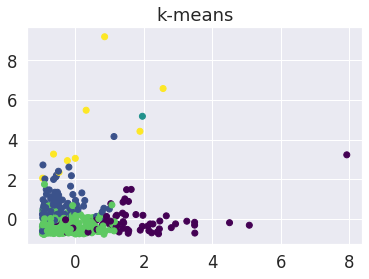

In [86]:
#Applying K-Means Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(dataset3_std)

# Visualize the k-means clusters
plt.scatter(dataset3_std[:, 0], dataset3_std[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('k-means')
plt.show()



The k-means and DBSCAN algorithms produce quite different clusterings of the data. The k-means clustering produces circular clusters, while the DBSCAN clustering produces more irregularly shaped clusters. Overall, the choice of clustering algorithm will depend on the specific characteristics of the dataset and the goals of the analysis. In this case, it's not immediately clear which algorithm is better, as they both produce somewhat different clusterings.





### **Part 5**

In [87]:
from sklearn.datasets import make_moons

# Generate the dataset
X_part5, y_part5 = make_moons(n_samples=2000, noise=0.05, random_state=42)

In [88]:
#Adding some additional noise 

rng = np.random.RandomState(42)
mask = rng.rand(X_part5.shape[0]) < 0.2
X_part5 = np.concatenate([X_part5, rng.uniform(low=-1.5, high=2.5, size=(mask.sum(), 2))])

Here, we're using a random mask to select 20% of the data points and then adding some random noise to their positions.

In [89]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

#Scaling the data
scaler_part5 = StandardScaler()
X_scaled = scaler_part5.fit_transform(X_part5)

#Appling DBSCAN to cluster the data
dbscan_part5 = DBSCAN(eps=0.2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

#Appling KNN to cluster the data
kmeans_part5 = KMeans(n_clusters=5, random_state=42)
kmeans_labels_part5 = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


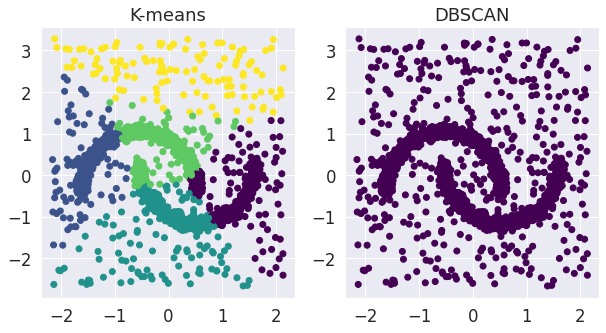

In [90]:
# Visualize the k-means and DBSCAN clusters
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels_part5, cmap='viridis')
ax[0].set_title('K-means')
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_clusters, cmap='viridis')
ax[1].set_title('DBSCAN')
plt.show()

Both clustering algorithms are able to identify the two moon-shaped clusters in the data, but they handle the noise differently. K-means clustering produces circular clusters that are distorted by the presence of the noise, while DBSCAN clustering produces irregularly shaped clusters that are less affected by the noise. In this case, DBSCAN clustering might be considered the better algorithm since it produces clusters that more closely match the true shape of the underlying data. However, the choice of clustering algorithm will depend on the specific characteristics of the dataset and the goals of the analysis.